# Homework 2 (Full mark: 100pt)
- Questions 1~3: Conceptual
- Questions 4~6: Programming

# Conceptual questions

# 1. Logistic function (5pt)
**Show how to derive the odds, i.e., $\frac{p(X)}{1-p(X)}=e^{\beta_{0}+\beta_{1} X}$, from the logistic function, i.e., $p(X)=\frac{e^{\beta_{0}+\beta_{1} X}}{1+e^{\beta_{0}+\beta_{1} X}}$.**

We know that the odds is $\frac{P(y=1|X;\beta)}{P(y=0|X;\beta)}=\frac{P(y=1|X;\beta)}{1-P(y=1|X;\beta)}=\frac{\frac{e^{\beta_{0}+\beta_{1} X}}{1+e^{\beta_{0}+\beta_{1} X}}}{1-\frac{e^{\beta_{0}+\beta_{1} X}}{1+e^{\beta_{0}+\beta_{1} X}}}=e^{\beta_{0}+\beta_{1} X}$. Therefore in this case, the odds would be $e^{\beta_{0}+\beta_{1} X}$

# 2. Discriminant function (10pt)
**Show that under the assumption that the observations in the $k$th class are drawn from a Gaussian distribution $N(\mu_k, \sigma^2)$, the Bayes’ classifier assigns an observation to the class for which the discriminant function is maximized. In other words, show that $\underset{k}{\arg \max } p_{k}(x)=\underset{k}{\arg \max } \delta_{k}(x)$, where $p_{k}(x)=\frac{\pi_{k} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{1}{2 \sigma^{2}}\left(x-\mu_{k}\right)^{2}\right)}{\sum_{l=1}^{K} \pi_{l} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(\frac{1}{2 \sigma^{2}}\left(x-\mu_{k}\right)^{2}\right)}$ and $\delta_{k}(x)=x \cdot \frac{\mu_{k}}{\sigma^{2}}-\frac{\mu_{k}^{2}}{2 \sigma^{2}}+\log \left(\pi_{k}\right)$**

The purpose of this problem is to prove discriminant function of LDA. In LDA, we classify a sample observation to the class $k$ for which $p_k(x)$ is maximized. Finding the $k$ that maximizes $p_k(x)$ is equivalent to finding the $k$ that maximizes $log(p_k(x))$, since log function is monotone increasing. Hence we can take $log(p_k(x)) = log \left( \frac{\pi_k \cdot e^{\gamma_k}}{\sum_{l=1}^{K} \pi_l \cdot e^{\gamma_l}} \right) = log(\pi_k \cdot e^{\gamma_k}) - log \left( \sum_{l=1}^{K} \pi_l \cdot e^{\gamma_l} \right) = log(\pi_k) + \gamma_k - log \left( \sum_{l=1}^{K} \pi_l \cdot e^{\gamma_l} \right)$ where, $\gamma_j = -\frac{1}{2\sigma^2} (x-\mu_j)^2$. We can omit $log \left( \sum_{l=1}^{K} \pi_l \cdot e^{\gamma_l} \right)$ because it has a constant value. Therefore, it is equivalent to choosing a $k$ to maximize $log(\pi_k)+\gamma_k$. Now, we continue $log(\pi_k) + \gamma_k = log(\pi_k) - \frac{1}{2\sigma^2} (x-\mu_k)^2 = log(\pi_k) - \frac{(x^2 + \mu_k^2 - 2\mu_kx)}{2\sigma^2} = log(\pi_k) - \frac{\mu_k^2}{2\sigma^2} + \frac{\mu_kx}{\sigma^2} - \frac{x^2}{2\sigma^2}$. Lastly, we can notice that $\frac{x^2}{2\sigma^2}$ is constant. Hence, choosing the k to maximize $p_k(x)$ is equivalent to finding the $k$ that maximizes $\delta_{k}(x)=x \cdot \frac{\mu_{k}}{\sigma^{2}}-\frac{\mu_{k}^{2}}{2 \sigma^{2}}+\log \left(\pi_{k}\right)$.

# 3. LDA vs. QDA (20pt)
**(a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?**

**(b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?**

**(c) In general, as the sample size $n$ increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?**

**(d) True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.**


(a) If the Bayes decision boundary is linear, we expect QDA to perform better on the training set because its higher flexiblity may yield a closer fit. On the test set, we expect LDA to perform better than QDA, because QDA could overfit the linearity on the Bayes decision boundary.

(b) If the Bayes decision bounary is non-linear, we expect QDA to perform better both on the training and test sets.

(c) Generally speaking, we would expect the test prediction accuracy of the higher flexibility model (QDA) to improve relative to the lower flexibility model (LDA), as for a large n the probability of nonlinear training relationships being spurious decreases.

(d) False. Particularly with a smaller sample size, the variance from using a more flexible method (QDA) will lead to overfitting, yielding a higher test error than LDA. I can’t see how QDA would be favourable regardless of the sample size though when we already know that the Bayes decision boundary is linear. If this logic was correct we would simply always favour the most flexible method.

# 4. Weekly dataset (25pt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
 
df = pd.read_csv('data/Weekly.csv')

**(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns? For numerical analyses, use ````pandas```` functions such as ````corr()```` and ````describe()````, and for graphical analyses use ````pairplot````, ````boxplot````, and ````scatterplot````.**

In [2]:
# Write your answer here
df.Direction = df.Direction.astype('category')
df['Day']=df.index
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Day
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,1
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,2
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,3
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,4
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1084
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1085
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1086
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1087


In [3]:
# corr()
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Day
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460,0.998863
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032,-0.031577
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167,-0.033129
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244,-0.030420
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826,-0.030935
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013,-0.030382
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078,0.842095
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000,-0.031183
Day,0.998863,-0.031577,-0.033129,-0.030420,-0.030935,-0.030382,0.842095,-0.031183,1.000000


In [4]:
# describe()
df.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Day
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089,1089.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605,NaN
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,NaN,544.000000
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,NaN,314.511526
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,NaN,0.000000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,NaN,272.000000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,NaN,544.000000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,NaN,816.000000


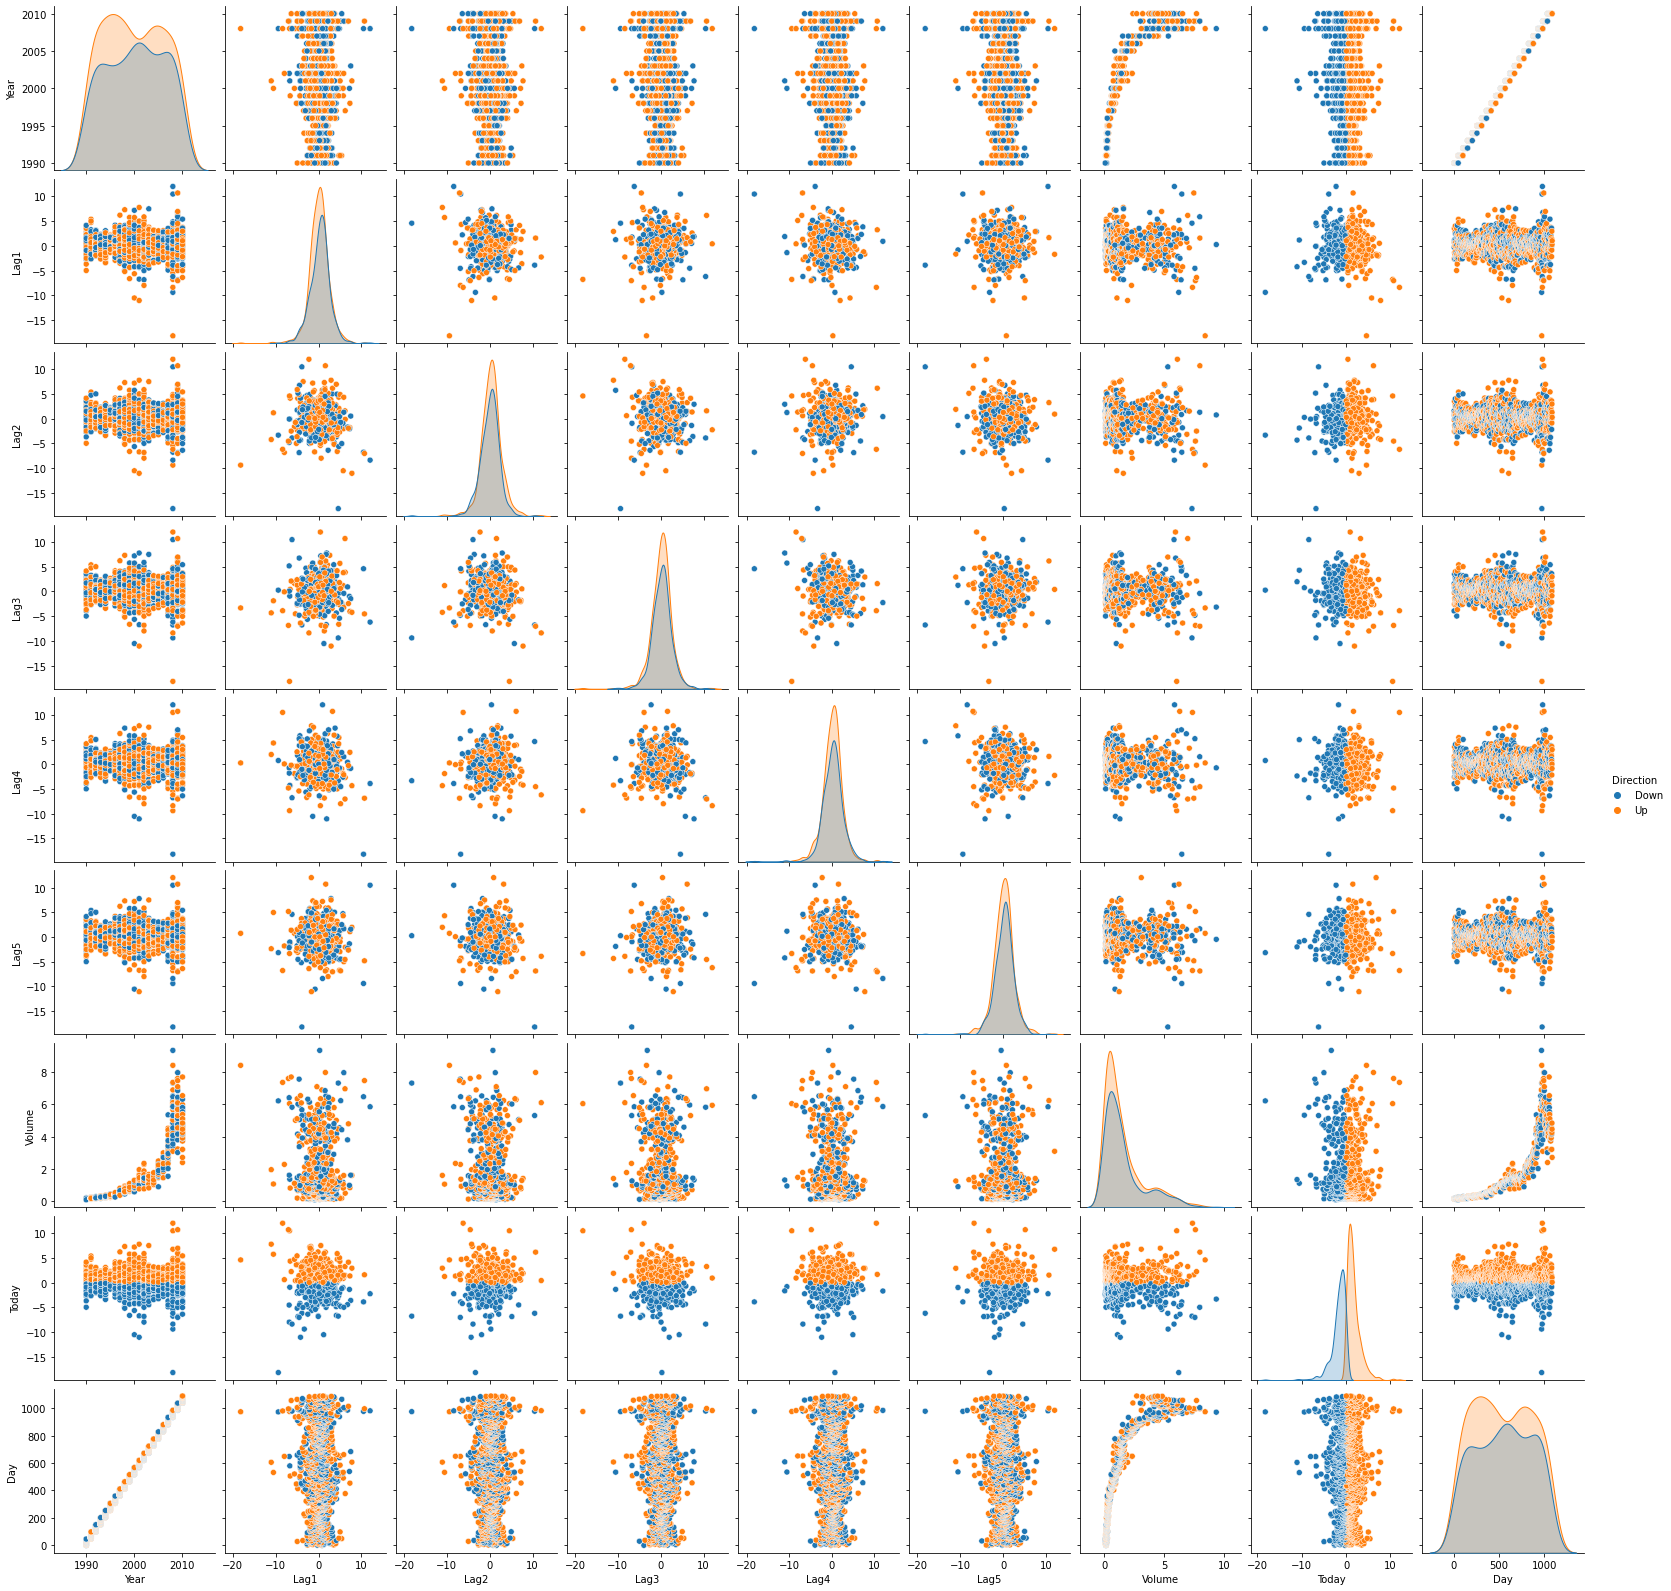

In [5]:
# pairplot()
sns.pairplot(df, hue='Direction');

As we can see in corr() table, there is no correlation between todays percentage return and the previous 5 days (lag1..lag5) days precentage returns. The only correlation is between years and volume. The plot below shows that volume increases over time.

<AxesSubplot:xlabel='Year', ylabel='Volume'>

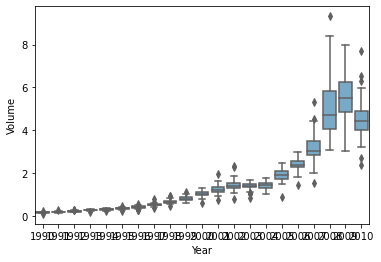

In [6]:
# boxplot()
sns.boxplot(x=df['Year'], y=df['Volume'], palette=sns.color_palette("Blues", 1))

Text(0, 0.5, 'Volume')

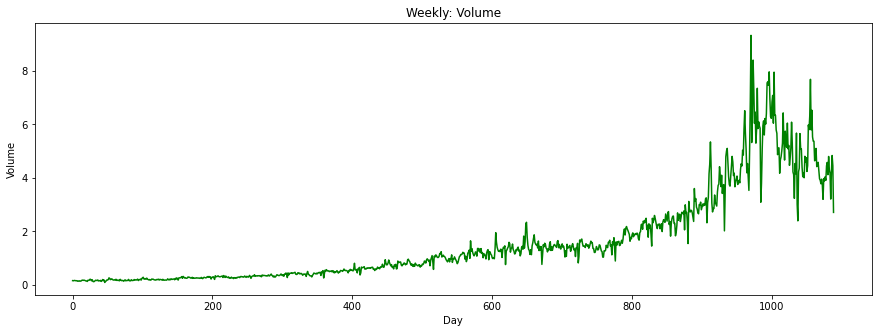

In [7]:
# df
plt.figure(figsize = (15,5))
plt.plot(df['Day'], df['Volume'], color = 'g')
plt.title("Weekly: Volume")
plt.xlabel("Day")
plt.ylabel("Volume")

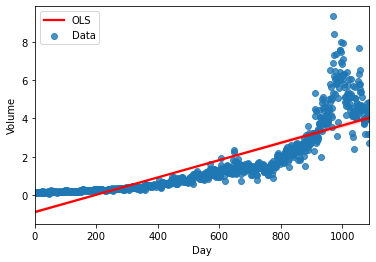

In [8]:
# ols
fig, ax = plt.subplots()
sns.regplot(x='Day', y='Volume', data=df, line_kws={"color": "red"}, ci=95, ax=ax)
ax.set(xlim=(0, None))
ax.legend(['OLS',"Data"])

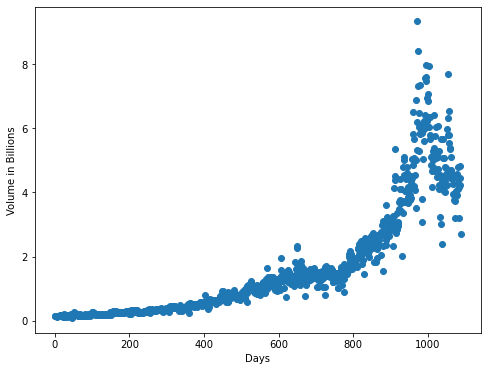

In [9]:
# scatter()
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(df.Day, df.Volume);
ax.set_xlabel('Days');
ax.set_ylabel('Volume in Billions');

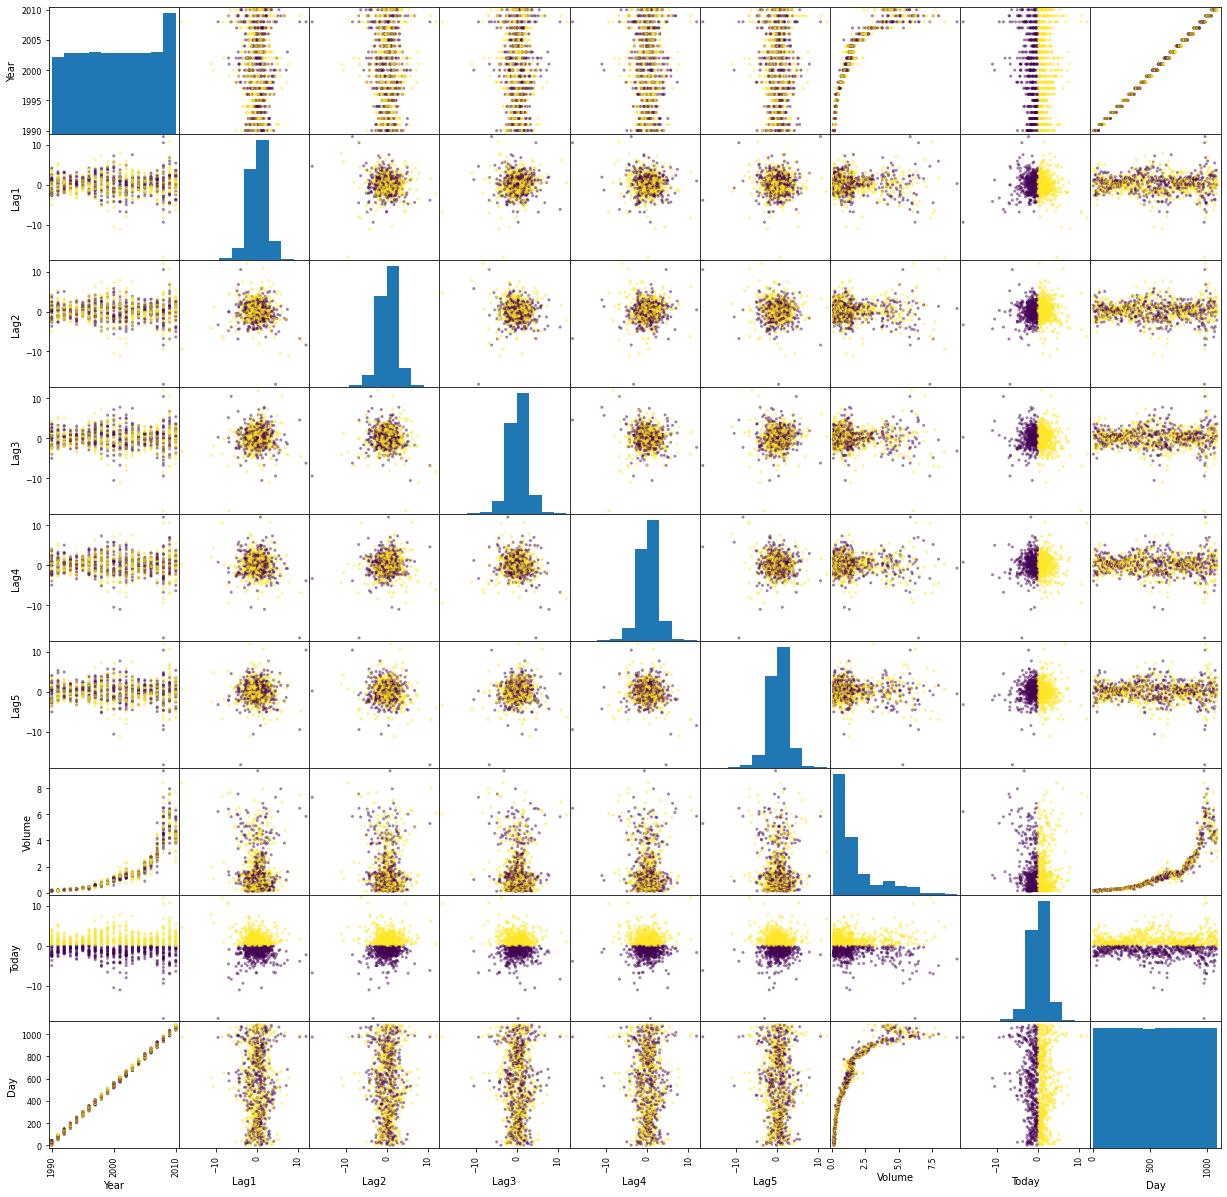

In [10]:
# scatter_matrix()
axes = pd.plotting.scatter_matrix(df, c=df.Direction.cat.codes, figsize=[21,21])

**(b) Fit the logistic regression model using a training data period from 1990 to 2008, with ````Lag2```` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010). Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**

In [14]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

train = df.loc[df['Year'] <= 2008]
test = df.loc[df['Year'] >= 2009]

X_train = sm.add_constant(train['Lag2'], prepend=True)
y_train = train.Direction

logistic_sklearn = LogisticRegression(fit_intercept=True, C=1e9) # Large C for no regularization
logistic_sklearn_fit = logistic_sklearn.fit(X_train, y_train)

print("Intercept: {}".format(logistic_sklearn_fit.intercept_))
print("Coefficients: {}".format(logistic_sklearn_fit.coef_))

Intercept: [0.10162869]
Coefficients: [[0.10162869 0.05809527]]


In [15]:
X_test = sm.add_constant(test['Lag2'], prepend=True)
y_test = test.Direction
y_test_pred = logistic_sklearn_fit.predict_proba(X_test)[:, 0]
y_test_pred_class = logistic_sklearn_fit.predict(X_test)
# prediction summary
pd.DataFrame({'prob_0': y_test_pred, 'prob_1': 1 - y_test_pred, 'pred_class': y_test_pred_class},  columns=['prob_0', 'prob_1', 'pred_class'])

,prob_0,prob_1,pred_class
0,0.473871,0.526129,Up
1,0.355264,0.644736,Up
2,0.513784,0.486216,Down
3,0.514800,0.485200,Down
4,0.480233,0.519767,Up
...,...,...,...
99,0.448742,0.551258,Up
100,0.461765,0.538235,Up
101,0.407154,0.592846,Up
102,0.431023,0.568977,Up


The confusion matrix is shown below.

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_m = pd.DataFrame(confusion_matrix(y_test, logistic_sklearn_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,9,34
1,5,56


The overall fraction of correct predictions is 62.5%. The accuracy is 0.625 which is larger than 0.5865, so that it is positive. However, our test dataset is relatively small thus we cannot say that this is a meaningful improvement.

In [18]:
test_acc = accuracy_score(y_test, logistic_sklearn_fit.predict(X_test))
test_error = 1 - test_acc
print('Accuracy: {:.4f}'.format(test_acc))
print('Training Error: {:.4f}'.format(test_error))

Accuracy: 0.6250
Training Error: 0.3750


**(c) Repeat (b) using LDA**

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

clf = LinearDiscriminantAnalysis()
clf.fit(train[['Lag2']], train['Direction'])
y_predict = clf.predict(test[['Lag2']])

print("Confusion Matrix: Down Up(Predicted)")
print("Down: " + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[0]))
print("Up: " + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[1]))

Confusion Matrix: Down Up(Predicted)
Down: [ 9 34]
Up: [ 5 56]


The percentage of correct predictions is 62.5%. However, the test sample size is not large enough for this increase over the baseline to be meaningful.

**(d) Repeat (b) using QDA**

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

clf = QuadraticDiscriminantAnalysis()
clf.fit(train[['Lag2']], train['Direction'])
y_predict = clf.predict(test[['Lag2']])

print("Confusion Matrix: Down Up(Predicted)")
print("Down: " + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[0]))
print("Up: " + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[1]))

Confusion Matrix: Down Up(Predicted)
Down: [ 0 43]
Up: [ 0 61]


The percentage of correct predictions is 58.65%. It behaves identically to the naive classifier on this dataset, with a sensitivity of 1 and a specificity of 0.

**(e) Repeat (b) using KNN with $K=1$**

In [21]:
from sklearn.neighbors import KNeighborsClassifier 

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train[['Lag2']], train['Direction'])
y_predict = neigh.predict(test[['Lag2']])

print("Confusion Matrix: Down Up(Predicted)")
print("Down: " + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[0]))
print("Up: " + str(confusion_matrix(y_true=test['Direction'], y_pred=y_predict)[1]))

Confusion Matrix: Down Up(Predicted)
Down: [21 22]
Up: [31 30]


The percentage of correct predictions is 49.04% which is again worse than the baseline.

# 5. Multi-class Classification (One-vs-the-rest and one-vs-one) (20pt)

**Build a classification model to classify the class of iris plant. For this, use ````sklearn.multiclass.OneVsOneClassifier```` and ````sklearn.multiclass.OneVsRestClassifier````. You are free to choose any classifier of your choice. Use train-test split of 80%:20%.**

In [82]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

df = pd.read_csv('data/iris.csv')
X = df.loc[:, 'sepal_length':'petal_width']
y = df['class']

In [66]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [85]:
model = LogisticRegression()
ovo = OneVsOneClassifier(model)
ovo.fit(X_train, y_train)
ovo_pred = ovo.predict(X_test)

ovo_df = X_test.copy()
ovo_df.insert(4,"Actual", y_test, True)
ovo_df.insert(5,"Predicted", ovo_pred, True)
ovo_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Actual,Predicted
128,6.4,2.8,5.6,2.1,Iris-virginica,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica


In [87]:
model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(X_train, y_train)
ovr_pred = ovr.predict(X_test)

ovr_df = X_test.copy()
ovr_df.insert(4,"Actual", y_test, True)
ovr_df.insert(5,"Predicted", ovo_pred, True)
ovr_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Actual,Predicted
128,6.4,2.8,5.6,2.1,Iris-virginica,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa
130,7.4,2.8,6.1,1.9,Iris-virginica,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica


I did KNN version just for fun.

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)
# model building
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [69]:
pd.DataFrame({'prob_0': knn.predict_proba(X_test)[:, 0], 
              'prob_1': knn.predict_proba(X_test)[:, 1],
              'prob_2': knn.predict_proba(X_test)[:, 2],
              'pred_class': knn.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'prob_2', 'pred_class'])

,prob_0,prob_1,prob_2,pred_class
0,0.0,0.0,1.0,Iris-virginica
1,1.0,0.0,0.0,Iris-setosa
2,0.0,0.0,1.0,Iris-virginica
3,0.0,0.0,1.0,Iris-virginica
4,0.0,0.0,1.0,Iris-virginica
5,0.0,1.0,0.0,Iris-versicolor
6,0.0,0.0,1.0,Iris-virginica
7,1.0,0.0,0.0,Iris-setosa
8,1.0,0.0,0.0,Iris-setosa
9,0.0,1.0,0.0,Iris-versicolor


In [70]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train ,y_train)
knn.predict(X_test)

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [72]:
pd.DataFrame({'prob_0': knn.predict_proba(X_test)[:, 0], 
              'prob_1': knn.predict_proba(X_test)[:, 1],
              'prob_2': knn.predict_proba(X_test)[:, 2],
              'pred_class': knn.predict(X_test)}, 
             columns=['prob_0', 'prob_1', 'prob_2', 'pred_class'])

,prob_0,prob_1,prob_2,pred_class
0,0.0,0.0,1.0,Iris-virginica
1,1.0,0.0,0.0,Iris-setosa
2,0.0,0.0,1.0,Iris-virginica
3,0.0,0.0,1.0,Iris-virginica
4,0.0,0.0,1.0,Iris-virginica
5,0.0,1.0,0.0,Iris-versicolor
6,0.0,0.0,1.0,Iris-virginica
7,1.0,0.0,0.0,Iris-setosa
8,1.0,0.0,0.0,Iris-setosa
9,0.0,1.0,0.0,Iris-versicolor


In [73]:
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy Score')

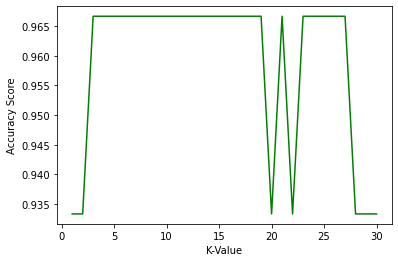

In [75]:
plt.plot(k_range, scores, color="green")
plt.xlabel("K-Value")
plt.ylabel("Accuracy Score") 

# 6. Newton's Method (20pt)

**In Lecture 3, we learned about Newton's method and two different perspectives of deriving the Newton's method. For this question, implement Newton's method.**

1.8389057419765231
5.41054837603514
5.140464854432734
4.305698829102502
3.1235991243219807
4.1862948890782645
3.0710613561767346
1.5817162002704956
0.8310419688929602
0.7570114774155755
0.8119373259310553
0.754623397045334
0.8238777277822458
0.7522353166750969
0.8859678174084614
0.7044737092703363
1.0244764788823362
0.6973094681596235
0.8501466118548677
0.871639335187022
Accuracy of Logistic Regression (Newton's method): 0.929


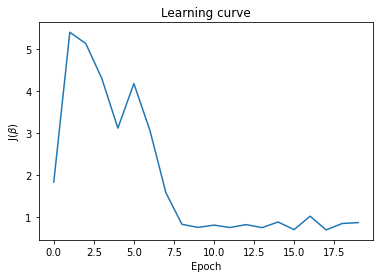

In [78]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from scipy.stats import logistic # Logistic function
import matplotlib.pyplot as plt

# load data
caravan = pd.read_csv('data/Caravan.csv', index_col=0)
caravan.Purchase = caravan.Purchase.astype('category')

X = caravan.iloc[:, 0:85].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X = sm.add_constant(X)
y = caravan.Purchase.factorize()[0]

X_train = X[1001:]
y_train = y[1001:]
X_test = X[:1000]
y_test = y[:1000]

beta = np.random.rand(X.shape[1])
epochs = 20  # The number of iterations to perform gradient descent
n = float(len(X_train)) # Number of elements in X

cost = []

# Performing Newton's method
######################## Write your answere here ########################
# X_train : (4821, 86)
# y_train : # (4821, )
# beta : (86, )
# y_train_pred : (4821,)
# grad : (86, )
# hessian : (86, 86)
# np.multiply(y_train, np.log(y_train_pred)) + np.multiply(1-y_train, np.log(1-y_train_pred))

for epoch in range(epochs): 
    
    y_train_pred = logistic.cdf(np.dot(X_train, beta))
    J = - (1/n) * sum( y_train*np.log(y_train_pred+1e-5) + (1-y_train)*np.log(1-y_train_pred+1e-5) )
    cost.append(J)
    print(J)
    grad = (1/n) * np.dot(X_train.T, y_train_pred-y_train)
    hessian = (1/n) * X_train.T.dot(np.diag(y_train_pred)).dot(np.diag(1-y_train_pred)).dot(X_train)
    beta = beta - np.linalg.inv(hessian+np.eye(86)*1e-5).dot(grad)
    
#########################################################################

plt.plot(np.arange(epochs), cost)
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel(r"J($\beta$)");
y_test_pred = logistic.cdf(np.dot(X_test, beta)) > 0.5
acc = accuracy_score(y_test, y_test_pred)
print("Accuracy of Logistic Regression (Newton's method): {}".format(acc))